In [1]:
import numpy as np
import pandas as pd

In [3]:
import scipy.stats as stats

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [15]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

In [16]:
sns.set_palette("Spectral")

# Set a base style
sns.set_style("whitegrid")

# Customize specific style parameters
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.color": "#cccccc",
    "axes.facecolor": "#f0f0f0",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12
}
sns.set_context("notebook", rc=custom_params)

In [7]:
df = pd.read_csv('Datasets/Titanic-Dataset.csv', usecols=['Age', 'Fare', 'Survived'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
df.fillna({'Age':'mean'}, inplace=True)

In [13]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1),
                                                   df['Survived'],
                                                   test_size=0.2,
                                                   random_state=42)

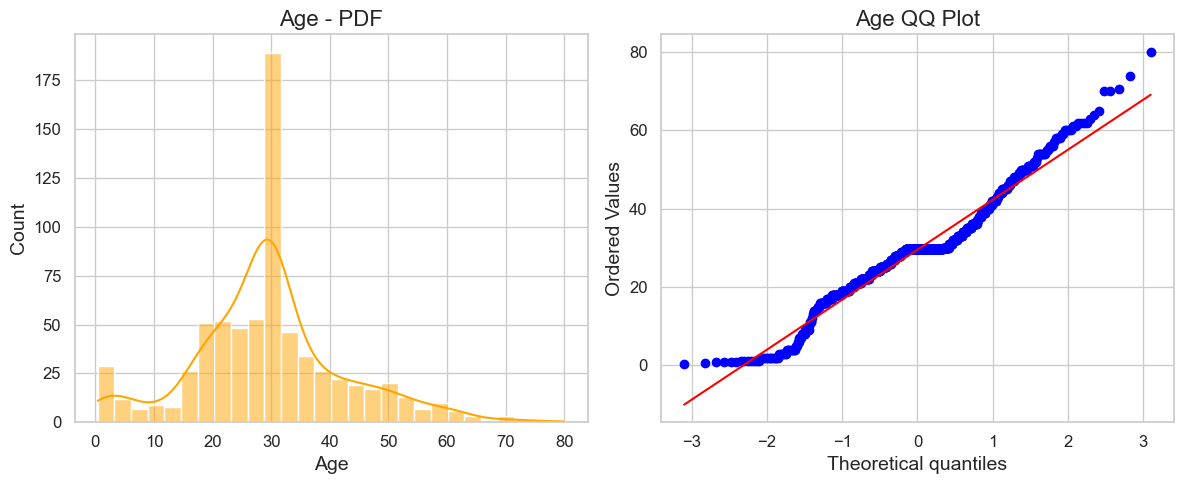

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(X_train['Age'], kde=True, ax=ax1, color='orange')
ax1.set_title('Age - PDF')

stats.probplot(X_train['Age'], dist="norm", plot=ax2)
ax2.set_title('Age QQ Plot')

plt.tight_layout()
plt.show()

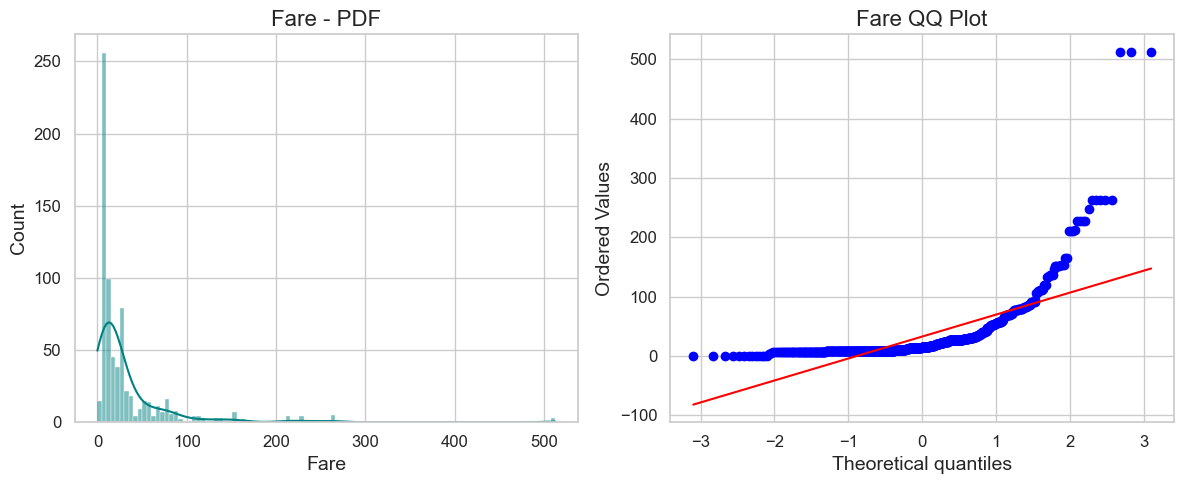

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(X_train['Fare'], kde=True, ax=ax1, color='teal')
ax1.set_title('Fare - PDF')

stats.probplot(X_train['Fare'], dist="norm", plot=ax2)
ax2.set_title('Fare QQ Plot')

plt.tight_layout()
plt.show()

In [22]:
logis = LogisticRegression()
decision = DecisionTreeClassifier()

In [23]:
logis.fit(X_train, y_train)
decision.fit(X_train, y_train)

y_pred = logis.predict(X_test)
y_pred1 = decision.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [24]:
log_transformer = FunctionTransformer(func=np.log1p)

In [25]:
X_train_transformed = log_transformer.fit_transform(X_train)
X_test_transformed = log_transformer.fit_transform(X_test)

In [28]:
logis = LogisticRegression()
decision = DecisionTreeClassifier()

logis.fit(X_train_transformed, y_train)
decision.fit(X_train_transformed, y_train)

y_pred = logis.predict(X_test_transformed)
y_pred1 = decision.predict(X_test_transformed)
    
print("Accuracy after log transformer LR",accuracy_score(y_test,y_pred))
print("Accuracy after log transformer DT",accuracy_score(y_test,y_pred1))

Accuracy after log transformer LR 0.6815642458100558
Accuracy after log transformer DT 0.6703910614525139


In [29]:
X_transformed = log_transformer.fit_transform(df.drop('Survived', axis=1))

In [30]:
logis = LogisticRegression()
decision = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(logis, X_transformed, df['Survived'], scoring= 'accuracy', cv=10)))
print('LR', np.mean(cross_val_score(decision, X_transformed, df['Survived'], scoring= 'accuracy', cv=10)))

LR 0.678027465667915
LR 0.6566167290886392


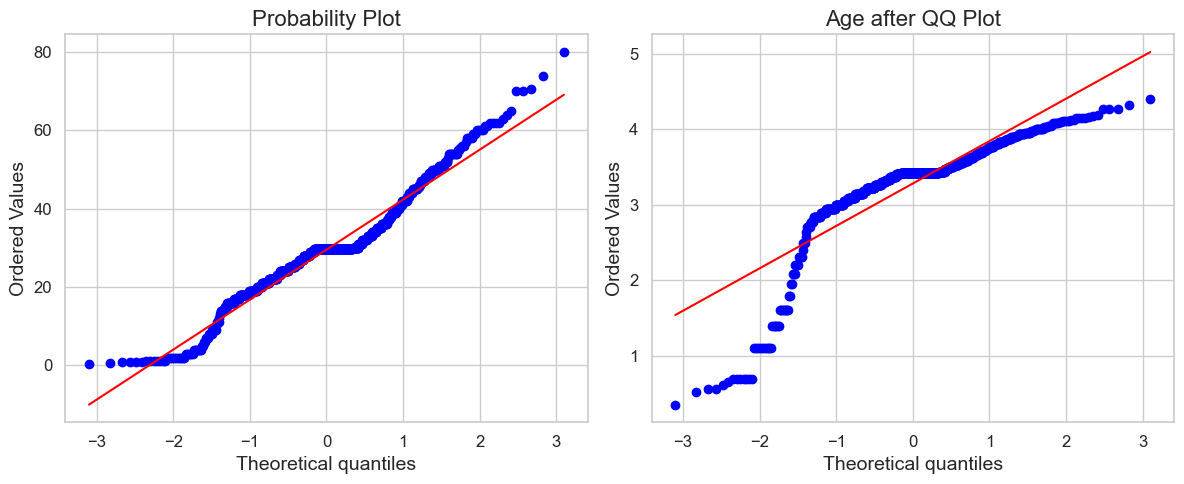

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(X_train['Age'], dist="norm", plot=ax1)
ax2.set_title('Age before QQ Plot')

stats.probplot(X_train_transformed['Age'], dist="norm", plot=ax2)
ax2.set_title('Age after QQ Plot')

plt.tight_layout()
plt.show()

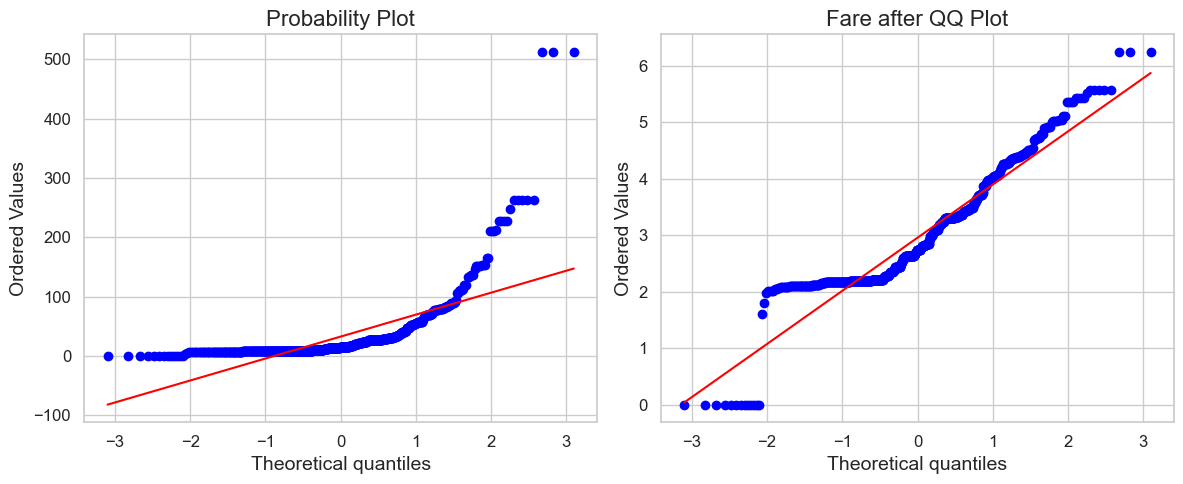

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

stats.probplot(X_train['Fare'], dist="norm", plot=ax1)
ax2.set_title('Fare before QQ Plot')

stats.probplot(X_train_transformed['Fare'], dist="norm", plot=ax2)
ax2.set_title('Fare after QQ Plot')

plt.tight_layout()
plt.show()

In [37]:
column_transform = ColumnTransformer([
     ('log', FunctionTransformer(np.log1p), ['Fare'])],
 remainder='passthrough')

In [39]:
X_train_transformed2 = column_transform.fit_transform(X_train)
X_test_transformed2 = column_transform.transform(X_test)

In [40]:
logis = LogisticRegression()
decision = DecisionTreeClassifier()

logis.fit(X_train_transformed2, y_train)
decision.fit(X_train_transformed2, y_train)

y_pred = logis.predict(X_test_transformed2)
y_pred2 = decision.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6815642458100558


In [44]:
X_transformed2 = log_transformer.fit_transform(df.drop('Survived', axis=1))

In [42]:
logis = LogisticRegression()
decision = DecisionTreeClassifier()

In [45]:
print('LR', np.mean(cross_val_score(logis, X_transformed2, df['Survived'], scoring= 'accuracy', cv=10)))
print('LR', np.mean(cross_val_score(decision, X_transformed2, df['Survived'], scoring= 'accuracy', cv=10)))

LR 0.678027465667915
LR 0.6644569288389514


In [46]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.61729088639201


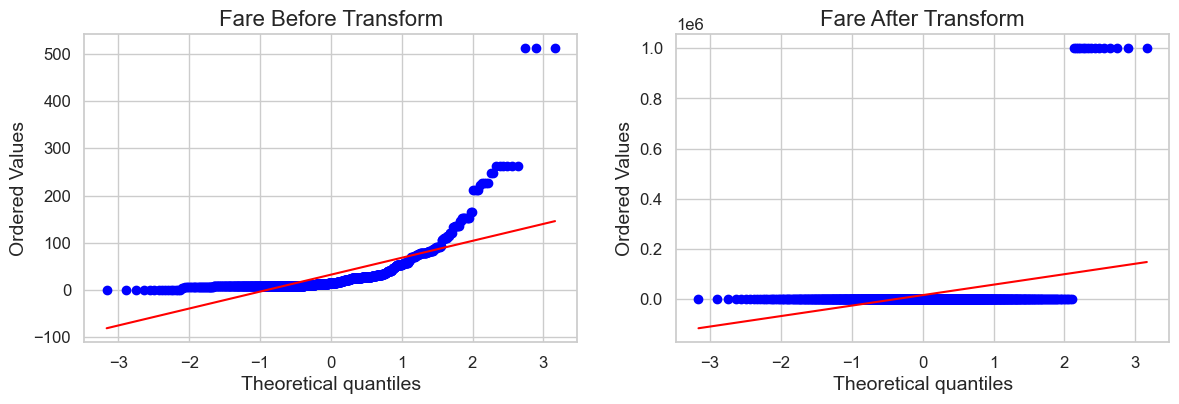

In [52]:
apply_transform(lambda x: 1/(x + 0.000001))